[[1.e-01 0.e+00]
 [0.e+00 2.e+03]]
Optimal x: [0. 0.]
Initial value: 2250.0125


<IPython.core.display.Javascript object>


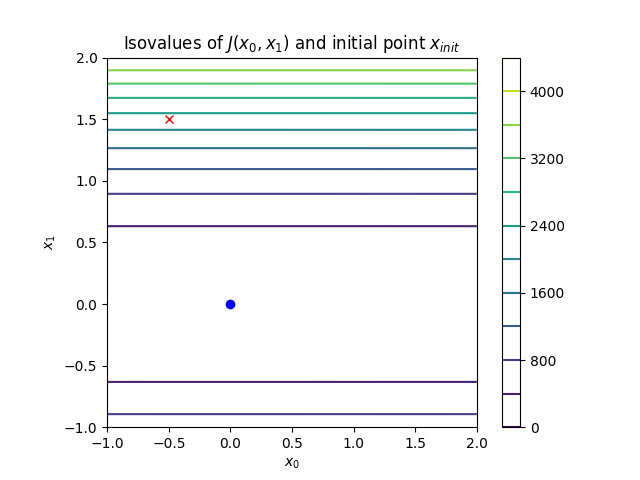

In [48]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from numpy.linalg import inv
from ipywidgets import *
%matplotlib notebook

A = np.array([[0.1,0],[0,2000]])
print(A)

b = np.array([0,0])

x0 = np.array([-0.5,1.5])

optx = np.linalg.solve(A,b)
analytic = optx

Tol = 1e-6
m1 = 0.1
m2 = 0.9
Maxiter = 10000

print("Optimal x:",optx)

def J(x):
    return 0.5*np.dot(x,A@x)-np.dot(b,x)
def GradJ(x):
    return A@x-b

print("Initial value:",J(x0))

plt.figure()
xmin=-1
xmax=2
ymin=-1
ymax=2
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)
plt.plot(x0[0],x0[1],'rx')
plt.plot(optx[0],optx[1],'bo')

plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.savefig('IllCondInit.png',dpi=300)

plt.show()


In [49]:
def gradientFixedStep(f,df,x_init,step=1e-01,tol=1e-16,maxiter=200):
    # initialization
    x=x_init
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        x=x-step*df(x)
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

In [50]:
xtab,ftab,conv = gradientFixedStep(J,GradJ,x0,step=1e-4,maxiter=1e3)

Has the algorithm converged ? :  False


<IPython.core.display.Javascript object>


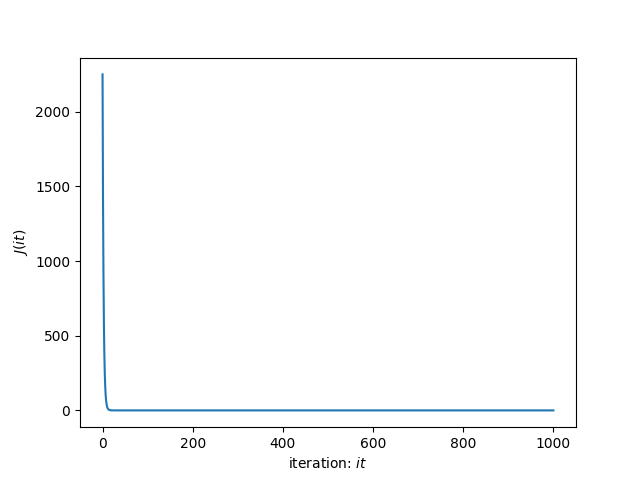

In [51]:
print('Has the algorithm converged ? : ',conv)
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
#plt.savefig('IllCondVariation.png',dpi=300)

plt.show()

<IPython.core.display.Javascript object>


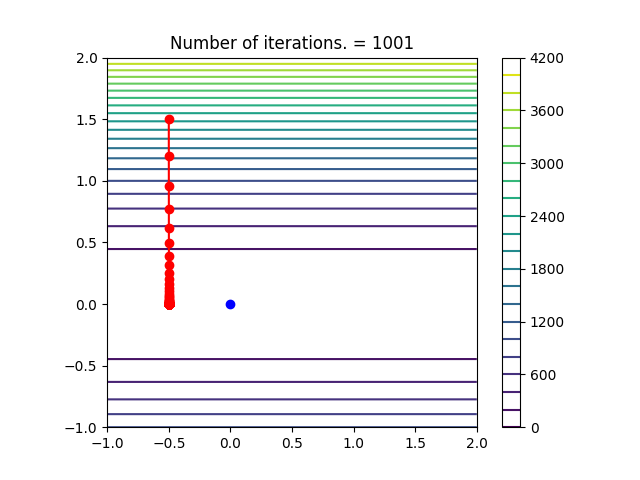

In [52]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)

lx0=[X[0] for X in xtab]
lx1=[X[1] for X in xtab]
plt.plot(lx0,lx1,"-ro")
plt.plot(optx[0],optx[1],'bo')

plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
#plt.savefig('IllCondFixed.png',dpi=300)

plt.axis('scaled')
plt.colorbar()

plt.show()

In [53]:
def gradientVariableStep(f,df,x_init,step=0.1,tol=1e-16,maxiter=200):
    # initialization
    maxstep = 10
    x=x_init.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        actx=x-step*df(x)
        if(f(actx)<f(x)):
            #accept iteration
            x = actx
            step = min(1.1*step,maxstep)
            xtab.append(x)
            ftab.append(f(x))
            it=it+1
        else:
            #refuse iteration
            step = 0.9*step
            
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

Has the algorithm converged ? :  False
[-6.75704721e-02  1.93191512e-05]


<IPython.core.display.Javascript object>


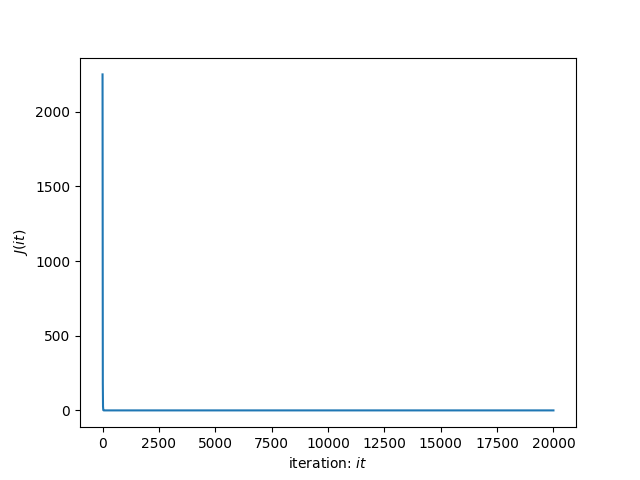

In [54]:
xtab3,ftab3,conv = gradientVariableStep(J,GradJ,x0,step=0.1,maxiter=20000)
print('Has the algorithm converged ? : ',conv)
print(xtab3[-1])
plt.figure()
plt.plot(ftab3)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

<IPython.core.display.Javascript object>


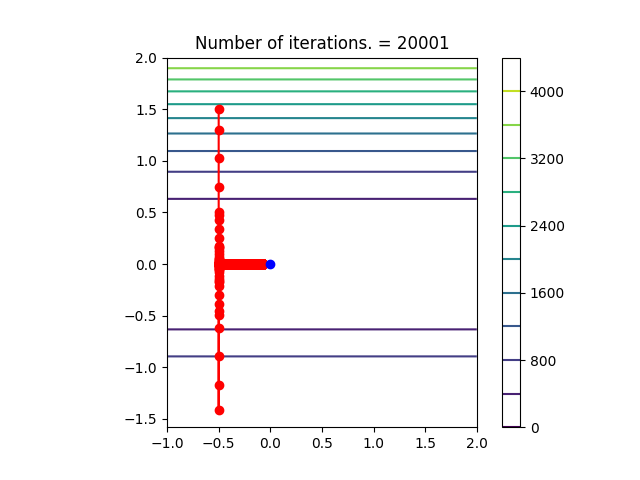

In [55]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab3]
lx1=[X[1] for X in xtab3]
plt.plot(lx0,lx1,"-ro")
plt.plot(optx[0],optx[1],'bo')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
#plt.savefig('IllCondVarStep.png',dpi=300)


plt.show()

In [56]:
def gradientOptimalStep(f,df,A,x0,tol=1e-08,maxiter=200):
    # initialization
    x=x0.copy()
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list of points
    ftab.append(f(x))
    it=0 # iteration
    while((it==0) or (it<maxiter and np.abs(f(xtab[-1])-f(xtab[-2]))>tol)):
        opt_step = np.dot(df(x),df(x))/(np.dot(df(x),A@df(x)))
        x=x-opt_step*df(x)
        xtab.append(x)
        ftab.append(f(x))
        it=it+1
    # booléen pour indiquer la convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

Has the algorithm converged ? :  True
[-2.77734268e-06 -2.31444977e-15]


<IPython.core.display.Javascript object>


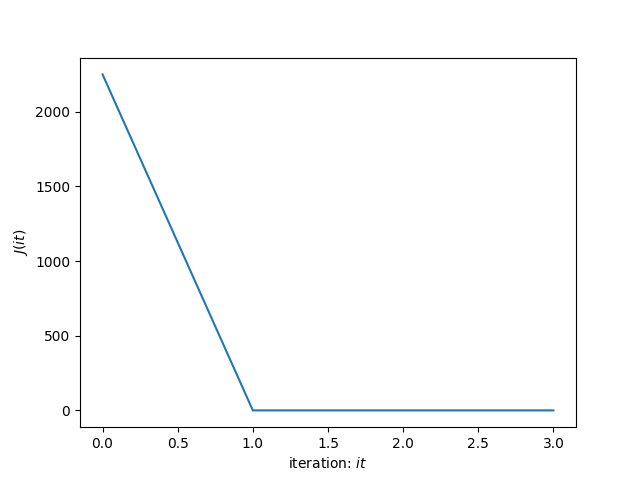

In [59]:
xtab4,ftab4,conv = gradientOptimalStep(J,GradJ,A,x0,Tol,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
print(xtab4[-1])
plt.figure()
plt.plot(ftab4)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

<IPython.core.display.Javascript object>


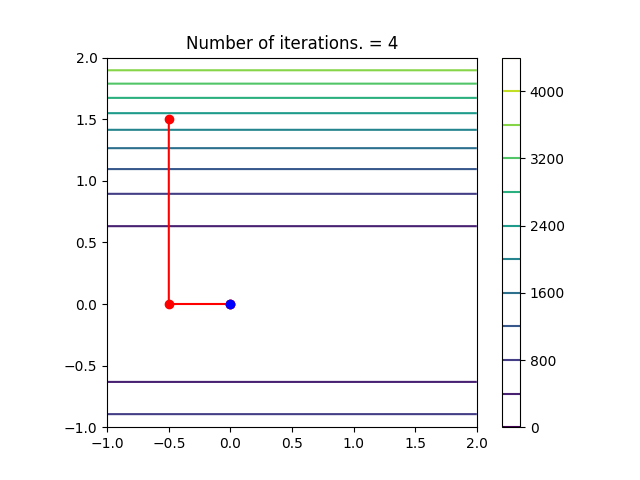

In [60]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab4]
lx1=[X[1] for X in xtab4]
plt.plot(lx0,lx1,"-ro")
plt.plot(optx[0],optx[1],'bo')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
#plt.savefig('IllCondOptimalStep.png',dpi=300)


plt.show()

In [61]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2):
  Newton=0
  phist = []
  vhist = []
  ghist = []
  phist.append(x0)            # Create an array which holds the optimization history
 
  val = f(x0)
  gd   = df(x0)
  vhist.append(val)
  ghist.append(gd)
  iter = 1
  step = 0.1
  prevval = val
  H = [[802,-400],[-400,200]]
  print(H)
  Hinv = np.linalg.inv(H)
  v = np.linalg.eigvals(A)  
  print("Eigenvalues: ",v)
  while abs(step*np.linalg.norm(gd))>=Tol: 
    #Line search
    tl=0
    tr=0
    t=1
    # choice of the descent direction
    if Newton==0:
      if(iter>0):
        d = -gd
      else:
        d = -Hinv@gd
        print("Test descent direction: ",np.dot(d,gd))
    else:
      if(iter<-100):
        d = -gd
      else:  
        H = [[-400*(x0[1]-3*x0[0]**2)+2, -400*x0[0]],[-400*x0[1], 200]]
        Hinv = np.linalg.inv(H)
        d = -Hinv@gd

    #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
    while (1==1):
        qt = f(x0+t*d)
        qp = np.dot(gd,d)
        #print(tl," ",tr)
        if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
            step=t   # we found a good step
            break
        if ((qt-val)/t>(m1*qp)):
            # step too big
            tr = t
        if ((qt-val)/t<(m2*qp)):
            # step too small
            tl = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if abs(tr-tl)<1e-15*tr or tr<1e-15:
            break
            
    x0 = x0+step*(d)
    val = f(x0)
    gd   = df(x0)
    if(iter%10==0):
          print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
    phist.append(x0)
    vhist.append(val)
    ghist.append(d)
    iter=iter+1
    if(iter>maxiter):
        print('Maximum number of iterations reached!')
        break
    #if(abs(val-prevval)<Tol):
        #print('Function does not decrease enough!')
        #break
    prevval = val
  if(np.linalg.norm(d)<Tol): 
    print('Algorithm converged!')
  print('')
  print('Final output:')
  print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
  return phist,vhist,ghist

[[802, -400], [-400, 200]]
Eigenvalues:  [1.e-01 2.e+03]
Iter:  10 | Val:  0.012478597441071545 | Step:  0.0009765625  Grad:  [0.04995363 0.08415642]
Iter:  20 | Val:  0.01245315847327992 | Step:  0.0009765625  Grad:  [0.04990487 0.05206979]
Iter:  30 | Val:  0.012428167002320708 | Step:  0.0009765625  Grad:  [0.04985129 0.0982353 ]
Iter:  40 | Val:  0.012402431484597446 | Step:  0.0009765625  Grad:  [0.04980263 0.06078077]
Iter:  50 | Val:  0.012378178384369156 | Step:  0.0009765625  Grad:  [0.04974915 0.1146695 ]
Iter:  60 | Val:  0.012352002253270877 | Step:  0.0009765625  Grad:  [0.04970059 0.07094904]
Iter:  70 | Val:  0.01232712539091636 | Step:  0.0009765625  Grad:  [0.04965208 0.04389804]
Iter:  80 | Val:  0.012301902233060541 | Step:  0.0009765625  Grad:  [0.04959877 0.0828184 ]
Iter:  90 | Val:  0.01227684241583867 | Step:  0.0009765625  Grad:  [0.04955035 0.05124193]
Iter:  100 | Val:  0.012252174595265439 | Step:  0.0009765625  Grad:  [0.04949715 0.09667344]
Iter:  110 | Va

Iter:  1210 | Val:  0.009772423137134232 | Step:  0.0009765625  Grad:  [0.04420866 0.03965145]
Iter:  1220 | Val:  0.009752455821903825 | Step:  0.0009765625  Grad:  [0.0441612  0.07480675]
Iter:  1230 | Val:  0.009732565008230646 | Step:  0.0009765625  Grad:  [0.04411809 0.04628491]
Iter:  1240 | Val:  0.00971304827875869 | Step:  0.0009765625  Grad:  [0.04407072 0.08732148]
Iter:  1250 | Val:  0.009692922289243842 | Step:  0.0009765625  Grad:  [0.0440277 0.0540281]
Iter:  1260 | Val:  0.009673988037880518 | Step:  0.0009765625  Grad:  [0.04398043 0.10192986]
Iter:  1270 | Val:  0.009653513044963168 | Step:  0.0009765625  Grad:  [0.0439375  0.06306669]
Iter:  1280 | Val:  0.009634064257538445 | Step:  0.0009765625  Grad:  [0.04389461 0.03902102]
Iter:  1290 | Val:  0.009614362135789605 | Step:  0.0009765625  Grad:  [0.04384748 0.07361738]
Iter:  1300 | Val:  0.009594767937819262 | Step:  0.0009765625  Grad:  [0.04380468 0.04554901]
Iter:  1310 | Val:  0.009575503680653902 | Step:  0.0

Iter:  2600 | Val:  0.007362353063777498 | Step:  0.0009765625  Grad:  [0.03837138 0.04651065]
Iter:  2610 | Val:  0.007347936827942915 | Step:  0.0009765625  Grad:  [0.03833018 0.08774738]
Iter:  2620 | Val:  0.007332414445710667 | Step:  0.0009765625  Grad:  [0.03829276 0.05429161]
Iter:  2630 | Val:  0.007318564724261593 | Step:  0.001953125  Grad:  [0.03825165 0.10242701]
Iter:  2640 | Val:  0.007302670276012272 | Step:  0.0009765625  Grad:  [0.03821431 0.06337429]
Iter:  2650 | Val:  0.007287802739198268 | Step:  0.0009765625  Grad:  [0.038177   0.03921134]
Iter:  2660 | Val:  0.007273145827274544 | Step:  0.0009765625  Grad:  [0.03813601 0.07397644]
Iter:  2670 | Val:  0.007258111926744598 | Step:  0.0009765625  Grad:  [0.03809879 0.04577117]
Iter:  2680 | Val:  0.007243875720461438 | Step:  0.0009765625  Grad:  [0.03805788 0.08635227]
Iter:  2690 | Val:  0.007228593751939788 | Step:  0.0009765625  Grad:  [0.03802073 0.05342842]
Iter:  2700 | Val:  0.007214907313643725 | Step:  0

Iter:  4040 | Val:  0.005490545309181788 | Step:  0.0009765625  Grad:  [0.03313613 0.04599441]
Iter:  4050 | Val:  0.005480115869869315 | Step:  0.001953125  Grad:  [0.03310055 0.08677344]
Iter:  4060 | Val:  0.005468264335948055 | Step:  0.0009765625  Grad:  [0.03306824 0.05368901]
Iter:  4070 | Val:  0.005457150685706843 | Step:  0.0009765625  Grad:  [0.03303596 0.03321881]
Iter:  4080 | Val:  0.005446144878231444 | Step:  0.0009765625  Grad:  [0.03300049 0.06267087]
Iter:  4090 | Val:  0.005434913642379973 | Step:  0.0009765625  Grad:  [0.03296828 0.03877612]
Iter:  4100 | Val:  0.005424211767953151 | Step:  0.0009765625  Grad:  [0.03293288 0.07315535]
Iter:  4110 | Val:  0.0054128042996782885 | Step:  0.0009765625  Grad:  [0.03290074 0.04526314]
Iter:  4120 | Val:  0.005402498978555632 | Step:  0.001953125  Grad:  [0.03286541 0.08539381]
Iter:  4130 | Val:  0.005390835432679051 | Step:  0.0009765625  Grad:  [0.03283333 0.0528354 ]
Iter:  4140 | Val:  0.005379886856236635 | Step:  0

Iter:  5500 | Val:  0.004078084554414503 | Step:  0.0009765625  Grad:  [0.02855654 0.0530931 ]
Iter:  5510 | Val:  0.004069693368734273 | Step:  0.0009765625  Grad:  [0.02852866 0.0328501 ]
Iter:  5520 | Val:  0.004061649799197396 | Step:  0.0009765625  Grad:  [0.02849803 0.06197526]
Iter:  5530 | Val:  0.004053133483860931 | Step:  0.0009765625  Grad:  [0.02847022 0.03834573]
Iter:  5540 | Val:  0.004045376006836476 | Step:  0.0009765625  Grad:  [0.02843965 0.07234337]
Iter:  5550 | Val:  0.004036677251198136 | Step:  0.0009765625  Grad:  [0.02841189 0.04476075]
Iter:  5560 | Val:  0.004028492270756671 | Step:  0.0009765625  Grad:  [0.02838415 0.02769465]
Iter:  5570 | Val:  0.004020337250705949 | Step:  0.0009765625  Grad:  [0.02835368 0.05224896]
Iter:  5580 | Val:  0.004012072425100212 | Step:  0.0009765625  Grad:  [0.028326   0.03232781]
Iter:  5590 | Val:  0.004004130725875038 | Step:  0.0009765625  Grad:  [0.02829559 0.06098991]
Iter:  5600 | Val:  0.0039957452841936384 | Step: 

Iter:  6950 | Val:  0.0030350060357854734 | Step:  0.0009765625  Grad:  [0.02463632 0.03248548]
Iter:  6960 | Val:  0.003029167914213353 | Step:  0.0009765625  Grad:  [0.02460987 0.06128738]
Iter:  6970 | Val:  0.0030226793366952827 | Step:  0.0009765625  Grad:  [0.02458585 0.03792012]
Iter:  6980 | Val:  0.003016559976036016 | Step:  0.0009765625  Grad:  [0.02456185 0.02346217]
Iter:  6990 | Val:  0.0030104381700046434 | Step:  0.0009765625  Grad:  [0.02453548 0.04426393]
Iter:  7000 | Val:  0.0030042625070329397 | Step:  0.0009765625  Grad:  [0.02451153 0.02738726]
Iter:  7010 | Val:  0.002998294902768829 | Step:  0.0009765625  Grad:  [0.02448521 0.05166903]
Iter:  7020 | Val:  0.002992033671982705 | Step:  0.0009765625  Grad:  [0.02446131 0.03196899]
Iter:  7030 | Val:  0.0029862664623583803 | Step:  0.0009765625  Grad:  [0.02443504 0.06031296]
Iter:  7040 | Val:  0.002979879823527321 | Step:  0.0009765625  Grad:  [0.02441119 0.03731722]
Iter:  7050 | Val:  0.002973850954897926 | St

Iter:  8300 | Val:  0.0023052675953774623 | Step:  0.0009765625  Grad:  [0.02147125 0.02796546]
Iter:  8310 | Val:  0.0023008207072412372 | Step:  0.0009765625  Grad:  [0.02144819 0.05275987]
Iter:  8320 | Val:  0.002295902946677607 | Step:  0.0009765625  Grad:  [0.02142726 0.03264392]
Iter:  8330 | Val:  0.0022912590186495866 | Step:  0.0009765625  Grad:  [0.02140634 0.02019766]
Iter:  8340 | Val:  0.002286602624101658 | Step:  0.0009765625  Grad:  [0.02138336 0.03810506]
Iter:  8350 | Val:  0.0022819174176543925 | Step:  0.0009765625  Grad:  [0.02136248 0.02357661]
Iter:  8360 | Val:  0.0022773757887876393 | Step:  0.0009765625  Grad:  [0.02133955 0.04447982]
Iter:  8370 | Val:  0.002272627613999363 | Step:  0.0009765625  Grad:  [0.02131872 0.02752084]
Iter:  8380 | Val:  0.0022682349814504565 | Step:  0.0009765625  Grad:  [0.02129583 0.05192104]
Iter:  8390 | Val:  0.0022633943116807864 | Step:  0.0009765625  Grad:  [0.02127504 0.03212491]
Iter:  8400 | Val:  0.002258818988534509 | 

Iter:  9690 | Val:  0.0017368076568306289 | Step:  0.0009765625  Grad:  [0.01863619 0.03280314]
Iter:  9700 | Val:  0.0017332530966222936 | Step:  0.0009765625  Grad:  [0.018618   0.02029617]
Iter:  9710 | Val:  0.0017297968795053568 | Step:  0.0009765625  Grad:  [0.01859801 0.03829092]
Iter:  9720 | Val:  0.0017261959921588028 | Step:  0.0009765625  Grad:  [0.01857986 0.0236916 ]
Iter:  9730 | Val:  0.0017228505637892867 | Step:  0.0009765625  Grad:  [0.01855991 0.04469676]
Iter:  9740 | Val:  0.0017191814663029114 | Step:  0.0009765625  Grad:  [0.01854179 0.02765507]
Iter:  9750 | Val:  0.0017157091716106848 | Step:  0.0009765625  Grad:  [0.01852369 0.01711092]
Iter:  9760 | Val:  0.001712214308857794 | Step:  0.0009765625  Grad:  [0.0185038 0.0322816]
Iter:  9770 | Val:  0.0017087129588779705 | Step:  0.0009765625  Grad:  [0.01848574 0.01997347]
Iter:  9780 | Val:  0.0017053010898801732 | Step:  0.0009765625  Grad:  [0.01846589 0.03768212]
Iter:  9790 | Val:  0.001701755115360546 | 

<IPython.core.display.Javascript object>


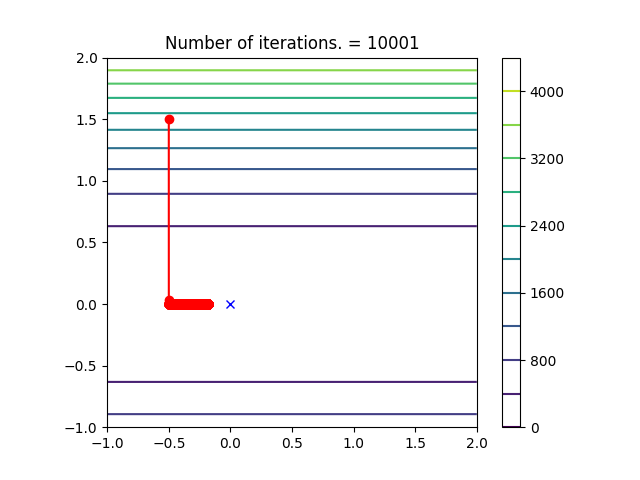

In [62]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Analytical sol: ',analytic)

plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")
plt.plot(analytic[0],analytic[1],'-bx')

plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()


In [63]:
def gradientRescaled(f,df,x_init,step=0.1,tol=1e-06,maxiter=200):
    # initialization
    x=x_init.copy()
    maxstep = 10
    print(x)
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    ftab.append(f(x))
    Hinv = inv(A) 
    print(Hinv)
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.sqrt(np.sum(df(x)**2))>tol)):
        actx=x-step*Hinv@df(x)
        if(f(actx)<f(x)):
            #accept iteration
            x = actx
            step = min(1.1*step,maxstep)
            xtab.append(x)
            ftab.append(f(x))
            it=it+1
        else:
            #refuse iteration
            step = 0.8*step
            
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv

[-0.5  1.5]
[[1.e+01 0.e+00]
 [0.e+00 5.e-04]]
Has the algorithm converged ? :  True
[-5.31759966e-11  1.59527990e-10]


<IPython.core.display.Javascript object>


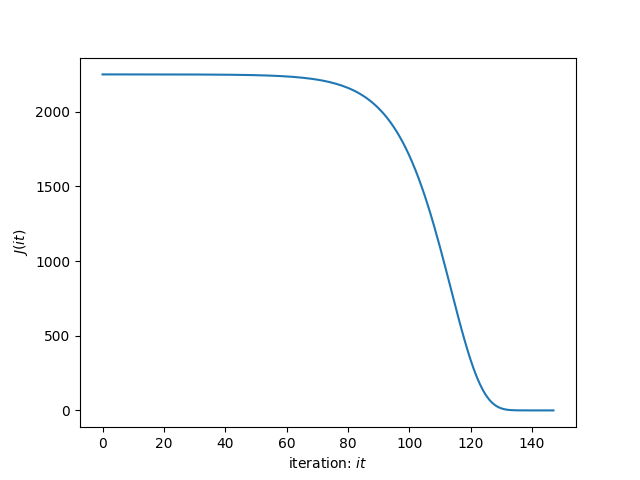

In [66]:
xtab5,ftab5,conv = gradientRescaled(J,GradJ,x0,Tol,maxiter=2000)
print('Has the algorithm converged ? : ',conv)
print(xtab5[-1])
plt.figure()
plt.plot(ftab5)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

<IPython.core.display.Javascript object>


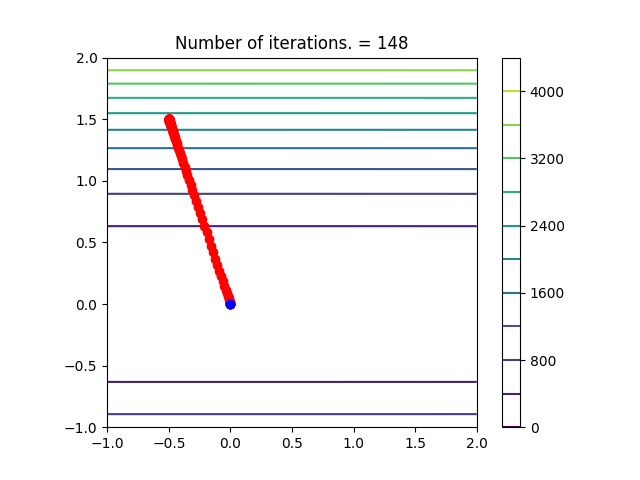

In [67]:
plt.figure()
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in xtab5]
lx1=[X[1] for X in xtab5]
plt.plot(lx0,lx1,"-ro")
plt.plot(optx[0],optx[1],'bo')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()
plt.savefig('IllCondRescaled.png',dpi=300)


plt.show()